# Importing libraries


In [ ]:
import numpy as np  # numerical operations on arrays and matrices
import pandas as pd  # data manipulation and analysis
import os  # interacting with the operating system and file paths
import re  # regular expression operations
import matplotlib.pyplot as plt  # creating static visualizations and plots
import seaborn as sns  # for attractive and informative statistical graphics
from sklearn.neighbors import NearestNeighbors  # Algorithm for unsupervised learning (nearest neighbors)
from sklearn.preprocessing import StandardScaler  # scaling features by removing the mean and scaling to unit variance
from IPython.display import display, HTML
# pd.set_option('display.max_columns', None)  # Set pandas to display all columns
# pd.set_option('display.max_rows', None)  # Set pandas to display all rows
from sklearn.experimental import enable_iterative_imputer  # Enable experimental feature for iterative imputation
from sklearn.impute import IterativeImputer  # Library for imputing missing values using multiple imputations
from sklearn.preprocessing import LabelEncoder  # encoding categorical labels into numerical form
from sklearn.model_selection import KFold  # Cross-validation strategy that splits data into k consecutive folds
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score  # Metrics for model evaluation
from sklearn.feature_extraction.text import TfidfVectorizer  # Convert text into a matrix of TF-IDF features
from sklearn.neighbors import NearestNeighbors  # Repeated for nearest neighbors algorithm
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import TruncatedSVD
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

In [ ]:
# importing the dataset

data= pd.read_csv("/content/Amazon-Products.csv")

In [ ]:
# using sample of data
n_samples = min(10000, len(data)) # Get the minimum between desired sample size and actual data size
df_sample = data.sample(n=n_samples, random_state=42).reset_index(drop=True)

# Overview of data

In [ ]:
df_sample.head()

,Unnamed: 0,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,16213,Karan Footwear Casual Men Sneaker,men's shoes,Casual Shoes,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Karan-Footwear-Casual-Sn...,NaN,NaN,"₹1,999","₹2,999"
1,484,HONEY BOO Presents New Born Baby Odddna Wrappe...,home & kitchen,Bedroom Linen,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/HONEY-BOO-Cotton-Full-Sl...,3.7,30,₹379,"₹1,299"
2,1338,Woodland Mens G 4092y14 Sneaker,men's shoes,Casual Shoes,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Woodland-Mens-Khaki-Leat...,4.2,279,"₹3,195","₹3,895"
3,4740,Sector z Polyester 25 Cms Duffle Bag(51_ Black),accessories,Bags & Luggage,https://m.media-amazon.com/images/I/31+X6ahhul...,https://www.amazon.in/Sector-Unisex-Artificial...,3.5,49,₹114,₹499
4,359,Tommy Hilfiger Maddison Unisex Polyester 14 In...,bags & luggage,Backpacks,https://m.media-amazon.com/images/I/61OveiqJNK...,https://www.amazon.in/Tommy-Hilfiger-Maddison-...,NaN,NaN,NaN,"₹3,299"


In [ ]:
df_sample.describe()

,Unnamed: 0
count,10000.000000
mean,5333.040800
std,5040.228767
min,0.000000
25%,945.750000
50%,3934.000000
75%,8275.250000
max,19144.000000


In [ ]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      10000 non-null  int64 
 1   name            10000 non-null  object
 2   main_category   10000 non-null  object
 3   sub_category    10000 non-null  object
 4   image           10000 non-null  object
 5   link            10000 non-null  object
 6   ratings         8208 non-null   object
 7   no_of_ratings   8208 non-null   object
 8   discount_price  9152 non-null   object
 9   actual_price    9789 non-null   object
dtypes: int64(1), object(9)
memory usage: 781.4+ KB


In [ ]:
df_sample.isnull().sum()

,0
Unnamed: 0,0
name,0
main_category,0
sub_category,0
image,0
link,0
ratings,1792
no_of_ratings,1792
discount_price,848
actual_price,211


In [ ]:
df_sample.duplicated().sum()

0

In [ ]:
df_sample.shape

(10000, 10)

# Data cleaning
Data cleaning is a crucial step in preparing datasets for analysis and modeling. It involves identifying and handling missing, incorrect, or irrelevant data. Common tasks include removing duplicates, filling in missing values, and standardizing formats to ensure consistency across features. Proper data cleaning improves the accuracy of machine learning models by eliminating noise and ensuring that the dataset represents the real-world problem effectively. This process enhances model performance and helps avoid misleading outcomes

In [ ]:
df = df_sample

In [ ]:
# as link is not useful to us we gona drop this
df = df_sample

1. Name

In [ ]:

df['name'].unique()

array(['Karan Footwear Casual Men Sneaker',
       'HONEY BOO Presents New Born Baby Odddna Wrapper Cum Blanket Unisex Sleeping Bag Cum Nest Bag/Snuggle Pod Baby Wrap Swaddle...',
       'Woodland Mens G 4092y14 Sneaker', ...,
       'Asleesha Small WiFi Bulb Holder 4K HD Camera Audio Video Recorder with Day Vision Features (Bulb Holder Camera)',
       'MILTON Aqua 500 Stainless Steel Water Bottle, 500 ml, Silver | Leak Proof | Office Bottle | Gym Bottle | Home | Kitchen | ...',
       'Shezone Beige Colour Synthetic Material Bellies for Women::4713_Beige'],
      dtype=object)

In [ ]:
df['name'].duplicated().sum()

266

In [ ]:
# Displaying duplicate rows based on the 'name' column

duplicate_names = df[df['name'].duplicated(keep=False)]

# Showing the data where there are only duplicated rows

duplicate_names.head(100)

,Unnamed: 0,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
3,4740,Sector z Polyester 25 Cms Duffle Bag(51_ Black),accessories,Bags & Luggage,https://m.media-amazon.com/images/I/31+X6ahhul...,https://www.amazon.in/Sector-Unisex-Artificial...,3.5,49,₹114,₹499
11,17492,Caprese Women's Satchel handbag,accessories,Bags & Luggage,https://m.media-amazon.com/images/I/51bmBB7Klx...,https://www.amazon.in/Caprese-Womens-Satchel-h...,4.4,48,"₹1,799","₹5,899"
33,15941,Shoprider Printed Passport Case/Card/Travel Do...,accessories,Bags & Luggage,https://m.media-amazon.com/images/I/41VYIASxqs...,https://www.amazon.in/Shoprider-Printed-Passpo...,NaN,NaN,₹289,₹599
43,6073,HIFFIN® 6 PCS Photography Backdrop Support Spr...,"tv, audio & cameras",Cameras,https://m.media-amazon.com/images/I/71vVavucL7...,https://www.amazon.in/Photography-Background-C...,4.1,78,₹429,"₹1,200"
53,5741,Labbin Casual Sneakers Shoes Lightweight for M...,men's shoes,Casual Shoes,https://m.media-amazon.com/images/I/41kcXNvmck...,https://www.amazon.in/Labbin-Casual-Sneakers-S...,3.1,30,₹449,₹999
...,...,...,...,...,...,...,...,...,...,...
2046,15782,Celby Lace-up Casual Elevator Shoes for Travel...,men's shoes,Casual Shoes,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Celby-Lace-up-Elevator-S...,NaN,NaN,NaN,"₹7,990"
2075,113,crocs unisex-adult Bayaband Clog LEMON/WHITE C...,men's shoes,Casual Shoes,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Crocs-Bayaband-Light-Clo...,4.3,302,"₹1,922","₹3,495"
2093,5640,Tuskr LensShield Lens Cover for Sony FE 200-60...,"tv, audio & cameras",Camera Accessories,https://m.media-amazon.com/images/I/31Udt6KJnQ...,https://www.amazon.in/LensShield-200-600mm-5-6...,4.4,50,"₹3,299","₹5,850"
2095,5508,Godox X2T-C TTL Wireless Flash Trigger for Canon,"tv, audio & cameras",Cameras,https://m.media-amazon.com/images/I/51LPMV9u6f...,https://www.amazon.in/Godox-Wireless-Trigger-F...,4.3,129,"₹4,400","₹4,590"


In [ ]:
duplicate_names_sorted = duplicate_names.sort_values(by='name')
duplicate_names_sorted.head(50)

,Unnamed: 0,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
6499,1224,"100% Pure Cotton Muslin Baby Swaddle Blanket, ...",toys & baby products,"Baby Bath, Skin & Grooming",https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Swaddle-Blanket-Receivin...,Get,FREE Delivery by Amazon,₹599,₹999
4466,996,"100% Pure Cotton Muslin Baby Swaddle Blanket, ...",toys & baby products,"Baby Bath, Skin & Grooming",https://m.media-amazon.com/images/I/418n51kjg0...,https://www.amazon.in/Swaddle-Blanket-Receivin...,5.0,1,₹399,₹599
6218,3266,"7-in-1 Electronic Cleaner Kit,Keyboard Cleaner...","tv, audio & cameras",Camera Accessories,https://m.media-amazon.com/images/I/61LMrgIYc4...,https://www.amazon.in/Electronic-Cleaner-Keybo...,4.2,180,₹269,₹999
7447,837,"7-in-1 Electronic Cleaner Kit,Keyboard Cleaner...","tv, audio & cameras",Cameras,https://m.media-amazon.com/images/I/61mR62UW3f...,https://www.amazon.in/Electronic-Cleaner-Keybo...,4.2,180,₹354,₹999
1469,787,ADOFYS Protective Frame Camera Mount+Black Sil...,"tv, audio & cameras",Camera Accessories,https://m.media-amazon.com/images/I/61XRtLDZlv...,https://www.amazon.in/ADOFYS-Protective-Silico...,4.0,"1,212","₹1,589","₹3,499"
3426,1149,ADOFYS Protective Frame Camera Mount+Black Sil...,"tv, audio & cameras",Cameras,https://m.media-amazon.com/images/I/61XRtLDZlv...,https://www.amazon.in/ADOFYS-Protective-Silico...,4.0,"1,212","₹1,589","₹3,499"
1288,16677,AJANTA Men Tan Loafers,men's shoes,Casual Shoes,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/AJANTA-Men-Tan-Loafers-J...,NaN,NaN,NaN,₹899
4482,16679,AJANTA Men Tan Loafers,men's shoes,Casual Shoes,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/AJANTA-Men-Tan-Loafers-J...,NaN,NaN,NaN,₹749
766,1285,ARVESA Monthly Birthday Milestone Special Unis...,kids' fashion,Baby Fashion,https://m.media-amazon.com/images/I/71R5YQWAMV...,https://www.amazon.in/ARVESA-Superhero-Unisex-...,3.4,3,₹349,₹599
976,1304,ARVESA Monthly Birthday Milestone Special Unis...,kids' fashion,Baby Fashion,https://m.media-amazon.com/images/I/61PUrVDeYr...,https://www.amazon.in/ARVESA-Monthly-Birthday-...,NaN,NaN,₹349,₹599


These are not actually duplicate values; the image addresses, discount, and other values are different, so it would be better to keep them to capture more relevance in our recommendation system

In [ ]:
def clean_product_names(name):

    if isinstance(name, str):  # Ensure it's a string

        # Remove special characters

        name = re.sub(r'[^a-zA-Z0-9\s]+', '', name)

        # Convert to lowercase

        name = name.lower()

        # Trim whitespace

        name = name.strip()

    return name

df['name'] = df['name'].apply(clean_product_names)
df['name'].unique()

array(['karan footwear casual men sneaker',
       'honey boo presents new born baby odddna wrapper cum blanket unisex sleeping bag cum nest bagsnuggle pod baby wrap swaddle',
       'woodland mens g 4092y14 sneaker', ...,
       'asleesha small wifi bulb holder 4k hd camera audio video recorder with day vision features bulb holder camera',
       'milton aqua 500 stainless steel water bottle 500 ml silver  leak proof  office bottle  gym bottle  home  kitchen',
       'shezone beige colour synthetic material bellies for women4713beige'],
      dtype=object)

2. main_category

In [ ]:
df['main_category'].unique()

array(["men's shoes", 'home & kitchen', 'accessories', 'bags & luggage',
       'toys & baby products', 'car & motorbike', 'sports & fitness',
       'appliances', 'beauty & health', 'tv, audio & cameras',
       'grocery & gourmet foods', 'stores', 'pet supplies',
       "women's shoes", "kids' fashion"], dtype=object)

In [ ]:
# Function to clean and standardize the main_category
def clean_category(category):
    category = category.lower()
    category = category.strip()
    category = category.replace('&', 'and')
    category = category.replace(',', '')
    if "home" in category:
        category = 'home and kitchen'
    return category
df['main_category'] = df['main_category'].apply(clean_category)

In [ ]:
df['main_category'].unique()

array(["men's shoes", 'home and kitchen', 'accessories',
       'bags and luggage', 'toys and baby products', 'car and motorbike',
       'sports and fitness', 'appliances', 'beauty and health',
       'tv audio and cameras', 'grocery and gourmet foods', 'stores',
       'pet supplies', "women's shoes", "kids' fashion"], dtype=object)

In [ ]:

main_category = df['main_category'].value_counts()
maincat_counts = main_category.values

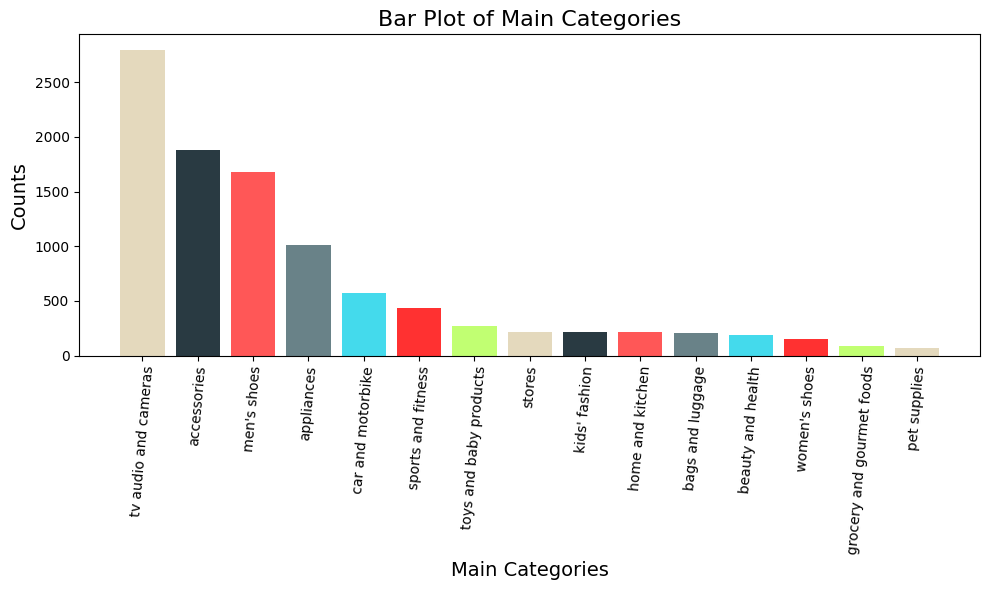

In [ ]:
# Custom colors
colors = ['#e4d9bd', '#293a42', '#ff5757', '#698288', '#44daec', '#ff3131', '#c1ff72']
# Create the bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(main_category.index, maincat_counts, color=colors)
plt.title('Bar Plot of Main Categories', fontsize=16)
plt.xlabel('Main Categories', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.xticks(rotation=85)
plt.tight_layout()
plt.show()

3. Sub category

In [ ]:
df['sub_category'].unique()

array(['Casual Shoes', 'Bedroom Linen', 'Bags & Luggage', 'Backpacks',
       'Baby Bath, Skin & Grooming', 'Car & Bike Care',
       'All Exercise & Fitness', 'All Appliances', 'Beauty & Grooming',
       'Cameras', 'All Electronics', 'Baby Products', 'Car Electronics',
       'All Car & Motorbike Products', 'All Grocery & Gourmet Foods',
       'Amazon Fashion', 'All Pet Supplies', 'Car Parts',
       'Camera Accessories', 'Camping & Hiking', 'Ballerinas',
       'Car Accessories', 'Baby Fashion', 'All Home & Kitchen',
       'Cardio Equipment', 'Air Conditioners',
       'All Sports, Fitness & Outdoors', 'Badminton'], dtype=object)

In [ ]:
# Function to clean and standardize sub_category
def clean_sub_category(category):
    category = category.lower().strip()
    category = category.replace('&', 'and')
    category = category.replace(',', '')
    category = category.replace("'", "")
    category = category.replace('-','')
    return category.title()
df['sub_category'] = df['sub_category'].apply(clean_sub_category)

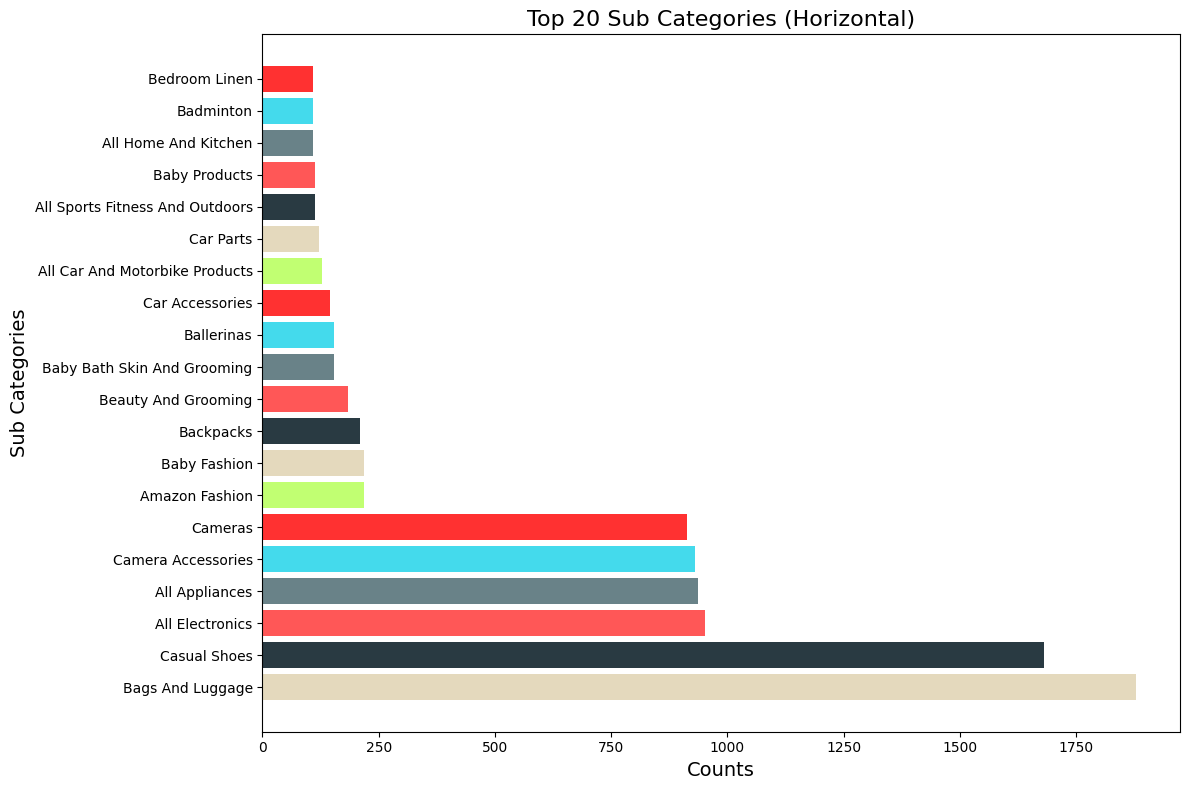

In [ ]:
subcat_counts = df['sub_category'].value_counts()
top_20_subcats = subcat_counts.nlargest(20)
colors = ['#e4d9bd', '#293a42', '#ff5757', '#698288', '#44daec', '#ff3131', '#c1ff72'] * 3
plt.figure(figsize=(12, 8))
plt.barh(top_20_subcats.index, top_20_subcats, color=colors[:len(top_20_subcats)])  # Use only necessary colors
plt.title('Top 20 Sub Categories (Horizontal)', fontsize=16)
plt.xlabel('Counts', fontsize=14)
plt.ylabel('Sub Categories', fontsize=14)
plt.tight_layout()
plt.show()

4. Rattings

In [ ]:

df['ratings'].unique()

array([nan, '3.7', '4.2', '3.5', '4.4', '4.5', '4.3', '4.1', '3.9', '2.5',
       '3.3', '3.8', '2.9', '5.0', '4.0', '3.6', 'Get', '3.1', '4.6',
       '3.0', '1.0', '1.6', '3.2', '3.4', '4.7', '4.9', '4.8', '2.6',
       '2.7', '2.3', '2.8', '2.4', '1.4', '2.0', '2.1', 'FREE', '2.2',
       '1.5', '1.9', '1.8', '1.3', '1.7', '1.2'], dtype=object)

In [ ]:
df['ratings'] = df['ratings'].replace(['Get', 'FREE', '₹68.99', '₹65', '₹70', '₹100', '₹99', '₹2.99'], 0.0)
df['ratings'] = df['ratings'].astype(float)
df['ratings'] = df['ratings'].apply(lambda x: f"{int(x)}.{int((x - int(x)) * 10)}" if pd.notnull(x) else '0.0')
print(df['ratings'].unique())

['0.0' '3.7' '4.2' '3.5' '4.4' '4.5' '4.0' '3.9' '2.5' '3.2' '2.9' '5.0'
 '3.6' '3.1' '3.0' '1.0' '1.6' '3.3' '4.7' '4.9' '2.6' '2.7' '2.2' '2.3'
 '1.3' '2.0' '2.1' '1.5' '1.9' '1.8' '1.7' '1.1']


In [ ]:
df['ratings'].isnull().sum()

0

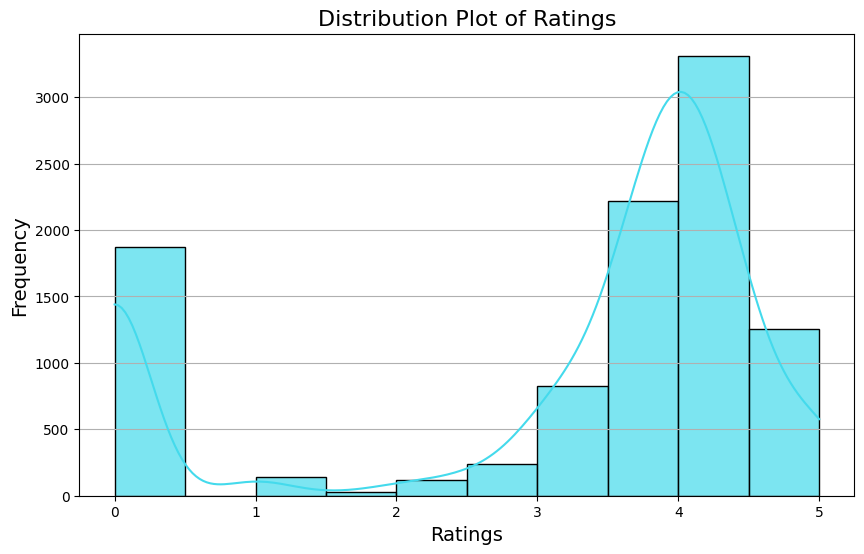

In [ ]:
# Convert ratings to numeric
df['ratings'] = pd.to_numeric(df['ratings'])
# Create a distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(df['ratings'], bins=10, kde=True, color='#44daec', alpha=0.7)
# Set title and labels
plt.title('Distribution Plot of Ratings', fontsize=16)
plt.xlabel('Ratings', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
# Show the plot
plt.grid(axis='y')
plt.show()

In [ ]:
df.columns

Index(['Unnamed: 0', 'name', 'main_category', 'sub_category', 'image', 'link',
       'ratings', 'no_of_ratings', 'discount_price', 'actual_price'],
      dtype='object')

5. No of rattings

In [ ]:
df['no_of_ratings'].isnull().sum()

1792

In [ ]:
df['no_of_ratings'] = df['no_of_ratings'].str.replace(',', '', regex=False)
df['no_of_ratings'] = pd.to_numeric(df['no_of_ratings'], errors='coerce')

In [ ]:
percentage_null = df['no_of_ratings'].isnull().mean() * 100
print(percentage_null)

18.69


In [ ]:
df['no_of_ratings'].value_counts()

,count
no_of_ratings,
1.0,569
2.0,373
3.0,266
4.0,228
5.0,200
...,...
2579.0,1
953.0,1
1705.0,1


In [ ]:
df['no_of_ratings'] = df['no_of_ratings'].fillna(0)

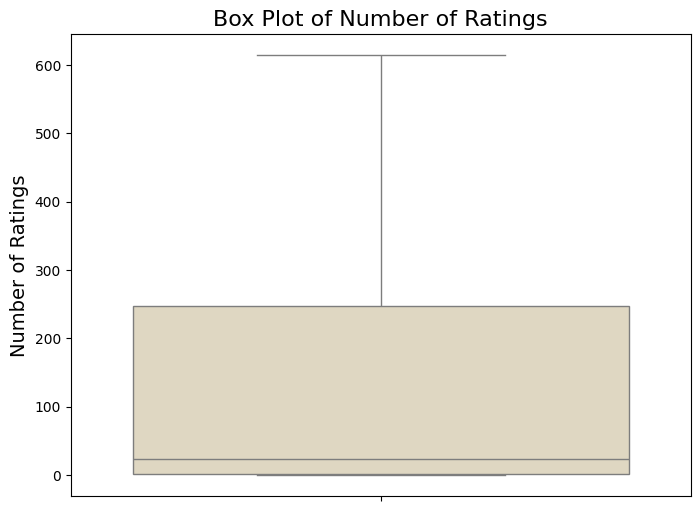

In [ ]:
Q1 = df['no_of_ratings'].quantile(0.25)
Q3 = df['no_of_ratings'].quantile(0.75)
IQR = Q3 - Q1  # Interquartile range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['no_of_ratings'] = df['no_of_ratings'].clip(lower_bound, upper_bound)
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['no_of_ratings'], color=colors[0])  # Using the first color
plt.title('Box Plot of Number of Ratings', fontsize=16)
plt.ylabel('Number of Ratings', fontsize=14)
# Show the plot

plt.show()

<ipython-input-39-535d222d38d2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.index, y=rating_counts.values, palette=colors[:len(rating_counts)])  # Use a subset of colors


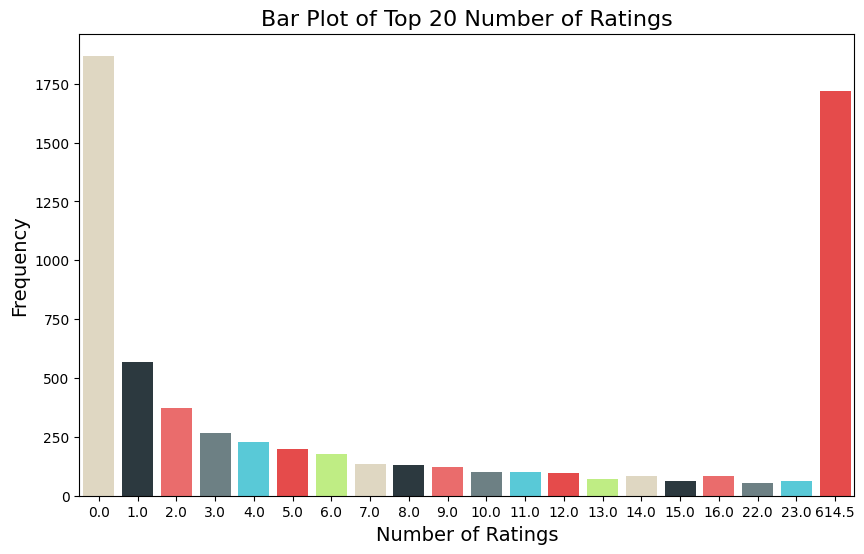

In [ ]:
# Value counts of no_of_ratings and get the top 20
rating_counts = df['no_of_ratings'].value_counts().nlargest(20)
# Create a bar plot with specified colors
plt.figure(figsize=(10, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette=colors[:len(rating_counts)])  # Use a subset of colors
plt.title('Bar Plot of Top 20 Number of Ratings', fontsize=16)
plt.xlabel('Number of Ratings', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
# Show the plot
plt.show()

6. Discount price /Actual price

In [ ]:
unique_discount_prices = df['discount_price'].unique()
# Print the unique values
unique_discount_prices

array(['₹1,999', '₹379', '₹3,195', ..., '₹16,799', '₹4,216', '₹4,130'],
      dtype=object)

In [ ]:
df["discount_price"] = df["discount_price"].str.split(" ", expand = True).get(0).str.split("₹", expand = True).get(1)
df["actual_price"] = df["actual_price"].str.split(" ", expand = True).get(0).str.split("₹", expand = True).get(1)

In [ ]:
# Change commas to dots and change the type to float

df['discount_price'] = df["discount_price"].str.replace(',', '').astype(float)

df["actual_price"] = df["actual_price"].str.replace(',', '').astype(float)

In [ ]:
df['main_category'] = df['main_category'].str.replace(' ', '')

df['sub_category'] = df['sub_category'].str.replace(' ', '')

In [ ]:
# Fill NaN values with the median for discount_price and actual_price

df['discount_price'] = df['discount_price'].fillna(df['discount_price'].median())

df['actual_price'] = df['actual_price'].fillna(df['actual_price'].median())

In [ ]:
# rechecking the null values

df.isnull().sum()


,0
Unnamed: 0,0
name,0
main_category,0
sub_category,0
image,0
link,0
ratings,0
no_of_ratings,0
discount_price,0
actual_price,0


# Tag creation
1. Tags help tailor recommendations to user interests.
2. They make it easier for users to find specific content.
3. Tags provide context, improving understanding of user preferences.
4. User-generated tags foster community involvement.
5. They introduce users to a wider range of content.

In [ ]:
# Loading the small English model and disable unnecessary components for speed
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner", "lemmatizer"])
# Function to clean text and extract tags
def clean_and_extract_tags(text):
    doc = nlp(text.lower())  # Convert text to lowercase and process with spaCy
    # Extracting tokens that are alphanumeric and not in the stopwords
    tags = [token.text for token in doc if token.text.isalnum() and token.text not in STOP_WORDS]
    return ', '.join(tags)

# List of columns to apply text cleaning and tag extraction
columns_to_extract_tags_from = ['name', 'main_category', 'sub_category']
# Apply batch processing for each column to improve performance
for column in columns_to_extract_tags_from:
    texts = df[column].astype(str).tolist()  # Convert the column to a list of strings
    # Process the texts in batches and apply the cleaning function
    df[column] = [' '.join([token.text for token in doc if token.text.isalnum() and token.text not in STOP_WORDS])
                  for doc in nlp.pipe(texts, batch_size=50)]  # Use batch_size=50 for efficiency

# Combining the cleaned tags from the specified columns into a single 'Tags' column

df['Tags'] = df[columns_to_extract_tags_from].apply(lambda row: ','.join(row), axis=1)

#  Rating-Based Recommendation System
This system uses user ratings to generate personalized recommendations. By applying python GROUP BY clause and a simple function, we can efficiently analyze user preferences and identify trending items. This approach enhances the accuracy of recommendations by considering the collective feedback of users.

1. Enhances personalization by focusing on user ratings.
2. Improves item discovery based on community feedback.
3. Facilitates analysis of user behavior trends.
4. Supports diverse recommendations through aggregated data.
5. Increases user engagement by showcasing popular content.
6. Builds trust as recommendations are based on actual user experiences.

In [ ]:
average_rating = df.groupby(['name','main_category', 'sub_category','no_of_ratings','discount_price','actual_price','image'])['ratings'].mean().reset_index()
average_rating.head()

,name,main_category,sub_category,no_of_ratings,discount_price,actual_price,image,ratings
0,00ra logo mens casual shoes tan6,,CasualShoes,0.0,499.0,999.0,https://m.media-amazon.com/images/I/71brJZZm6E...,0.0
1,1 pc cloth dust remover cleaner lint roller re...,appliances,AllAppliances,70.0,229.0,499.0,https://m.media-amazon.com/images/I/31Zitjp+77...,3.6
2,1 pcs racket grip tape super absorbent bad nto...,sportsandfitness,Badminton,0.0,429.0,768.0,https://m.media-amazon.com/images/I/518VwTXyXg...,0.0
3,100 pure cotton muslin baby swaddle blanket mu...,toysandbabyproducts,BabyBathSkinAndGrooming,0.0,599.0,999.0,https://m.media-amazon.com/images/W/IMAGERENDE...,0.0
4,100 pure cotton muslin baby swaddle blanket mu...,toysandbabyproducts,BabyBathSkinAndGrooming,1.0,399.0,599.0,https://m.media-amazon.com/images/I/418n51kjg0...,5.0


In [ ]:
top_rated_products = average_rating.sort_values(by='ratings', ascending=False)
# Select the relevant columns
top_rated_products = top_rated_products[['main_category', 'sub_category', 'no_of_ratings', 'discount_price', 'actual_price','image','ratings']]
# Display the result
rating_based_recomendation = top_rated_products.head(10)

In [ ]:
rating_based_recomendation['no_of_ratings'] = rating_based_recomendation['no_of_ratings'].astype(int)
rating_based_recomendation['ratings'] = rating_based_recomendation['ratings'].astype(int)
rating_based_recomendation

<ipython-input-49-dbbaf72a5f18>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_based_recomendation['no_of_ratings'] = rating_based_recomendation['no_of_ratings'].astype(int)
<ipython-input-49-dbbaf72a5f18>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_based_recomendation['ratings'] = rating_based_recomendation['ratings'].astype(int)


,main_category,sub_category,no_of_ratings,discount_price,actual_price,image,ratings
3271,carandmotorbike,CarParts,2,930.0,3999.0,https://m.media-amazon.com/images/W/IMAGERENDE...,5
2530,accessories,BagsAndLuggage,1,799.0,1699.0,https://m.media-amazon.com/images/W/IMAGERENDE...,5
1818,sportsandfitness,Badminton,4,664.0,1519.0,https://m.media-amazon.com/images/I/6184qPiYZm...,5
3231,,CasualShoes,3,1545.0,2399.0,https://m.media-amazon.com/images/I/61i5lQinVr...,5
3230,accessories,BagsAndLuggage,1,599.0,2499.0,https://m.media-amazon.com/images/W/IMAGERENDE...,5
8707,carandmotorbike,CarElectronics,1,664.0,1499.0,https://m.media-amazon.com/images/W/IMAGERENDE...,5
764,accessories,BagsAndLuggage,9,1099.0,1899.0,https://m.media-amazon.com/images/W/IMAGERENDE...,5
1814,,Ballerinas,4,763.0,1695.0,https://m.media-amazon.com/images/W/IMAGERENDE...,5
8331,,CasualShoes,2,838.0,1049.0,https://m.media-amazon.com/images/I/81kazEXR3-...,5
9047,tvaudioandcameras,CameraAccessories,1,325.0,899.0,https://m.media-amazon.com/images/I/51AaqsjJMz...,5


#  Content-Based Recommendation System
A content-based recommendation system suggests items based on the features and attributes of the items themselves. This approach analyzes the characteristics of the items that a user has interacted with previously to recommend similar items. By employing techniques such as TF-IDF vectorization, we can convert textual data (such as item descriptions or tags) into a numerical format, allowing for effective comparisons between items.

Tags are essential elements in this system; they serve as the primary features from which item vectors are created. Each item (e.g., movie, product) is represented as a vector in a multi-dimensional space based on these tags. The system calculates the similarity between these vectors to determine the most relevant recommendations for the user.

1. Recommends items based on the characteristics of previously liked items.
2. Utilizes features like tags to represent items as vectors.
3. Employs TF-IDF to convert textual data into numeric form for analysis.
4. Enhances user experience by suggesting similar items based on individual preferences.
5. Increases the likelihood of user engagement through relevant recommendations.
6. Allows for discovery of new items that share similar attributes with items the user enjoys.

In [ ]:
df['Tags'].value_counts()

,count
Tags,
"backpack womensgirls,bagsandluggage,Backpacks",14
"crocs unisexadult bayaband clog lemonwhite clog 8 uk men 9 uk women m9w11 2050897b0,,CasualShoes",8
"shoprider printed passport casecardtravel document holder travel usepassport cover holder sleevepassport wallet le,accessories,BagsAndLuggage",6
"pro khadims mens sneakers,,CasualShoes",5
"red tape mens sneakers,,CasualShoes",5
...,...
"puma mens flexy sneaker,,CasualShoes",1
"baby wish baby hooded towels new born bath towel boys girls kids towels set ultra absorbent mushroom print bab,toysandbabyproducts,BabyBathSkinAndGrooming",1
"raise cctv camera direct pole mounting standbracket steel looping ring 200 mm diameter,tvaudioandcameras,Cameras",1


In [ ]:
df['name'][10]

'puma unisexadult storm loud closed shoe'

In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix_content = tfidf_vectorizer.fit_transform(df['Tags'])
# Dimentionality reduction
n_components = 12
svd = TruncatedSVD(n_components=n_components)
reduced_tfidf_matrix = svd.fit_transform(tfidf_matrix_content)
cosine_sim_matrix = cosine_similarity(reduced_tfidf_matrix)

In [ ]:
cosine_sim_matrix

array([[ 1.        , -0.0709324 ,  0.47280495, ..., -0.08347936,
         0.06650417,  0.16889399],
       [-0.0709324 ,  1.        ,  0.02513746, ...,  0.00655017,
         0.29685465, -0.08672182],
       [ 0.47280495,  0.02513746,  1.        , ..., -0.0377272 ,
        -0.03974704, -0.05046473],
       ...,
       [-0.08347936,  0.00655017, -0.0377272 , ...,  1.        ,
        -0.09479522,  0.0698292 ],
       [ 0.06650417,  0.29685465, -0.03974704, ..., -0.09479522,
         1.        , -0.15504961],
       [ 0.16889399, -0.08672182, -0.05046473, ...,  0.0698292 ,
        -0.15504961,  1.        ]])

In [ ]:
filtered_df = df[df['name'] == item_name]
print(filtered_df)



Empty DataFrame
Columns: [Unnamed: 0, name, main_category, sub_category, image, link, ratings, no_of_ratings, discount_price, actual_price, Tags]
Index: []
